# Classifying Iris Species
Here we will design a simple machine learning model using the famous iris dataset.

### __CASE__:

Let’s assume that you are an enthusiastic hobby botanist who is interested in distinguishing the species of some
iris flowers that you've found. You have collected some measurements associated with
each iris: the **_length_ and _width_ of the petals** and **_the length and width of the sepals_**, in centimeters.

Take a look at which parts of the flower are petals and sepals:
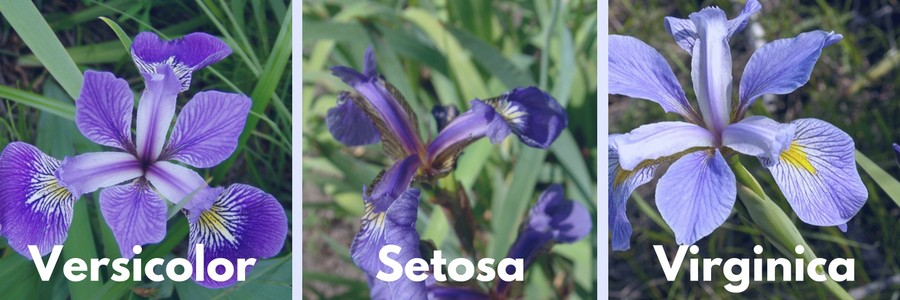

You also have the measurements of some irises that have been previously identified by
an expert botanist as belonging to the species **__setosa__**, **_versicolor_**, or **_virginica_**. For these
measurements, you can be certain of which species each iris belongs to. Let’s assume
that these are the only species you will encounter in the wild.

### __GOAL__:
Our goal is to build a machine learning model that can learn from the measurements
of these irises whose species is known, **so that we can predict the species for a new
iris in the test data.**


This is a supervised (machine) learning problem because we have measurements for which we know the correct species of iris. This is a __classification__ problem since we want to predict one of the several options(the iris species), and the possible different species of irises are called __classes__. Furthermore, this problem is a three-class classification problem since every iris in the dataset belongs to one of three classes. 
The desired output for a single data point (an iris) is the species of this flower. For a
particular data point, the species it belongs to is called its _label_.
___
Our Data
---
In this example, we will use the `Iris_train.csv` and `Iris_test.csv` datasets provided. 

We will go ahead and load dataset:

In [1]:
# Importing essential starter libraries
import numpy as np
import pandas as pd
###############################################################################################################

# Sklearn imports
from sklearn import metrics # for checking the model accuracy
#from sklearn import datasets
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression # for Logistic Regression Algorithm
#from sklearn.cross_validation import train_test_split # to split the dataset for training and testing 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier # KNN classifier
from sklearn import svm # for suport vector machine algorithm
from sklearn.tree import DecisionTreeClassifier # for using DTA
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
###############################################################################################################

# Visualization Libraries
import seaborn as sns
sns.set_style("darkgrid")   # Seaborn default configuration
import matplotlib.pyplot as plt
# set the custom size for my graphs
sns.set(rc={'figure.figsize':(15,10)})
###############################################################################################################

# Visualization with Plotly
import chart_studio.plotly as ply # more fancy plots
import cufflinks as cf
from chart_studio.plotly import plot_mpl
import plotly.express as px
import plotly.graph_objects as go

###############################################################################################################

# To have graphs embedded in the notebook
%matplotlib inline
###############################################################################################################

# Print the graphs as PDF and PNG
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')
###############################################################################################################

# `do not disturb` mode
import warnings


#### Load Train and Test datasets.

In [2]:
# Load train dataset
df_train = pd.read_csv('Iris_train.csv')


# Load test dataset
df_test = pd.read_csv('Iris_test.csv')

#### Preview the Datasets
1. Train dataset preview


In [3]:
# Train dataset preview
df_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),TYPE
0,4.8,3.1,1.6,0.2,0
1,5.2,3.5,1.5,0.2,0
2,4.6,3.2,1.4,0.2,0
3,4.5,2.3,1.3,0.3,0
4,5.5,2.6,4.4,1.2,1


2. Test dataset preview

In [7]:
# Test dataset preview
df_test.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.5,2.3,4.0,1.3
1,4.4,3.2,1.3,0.2
2,6.9,3.1,5.1,2.3
3,6.0,2.7,5.1,1.6
4,5.0,2.0,3.5,1.0


In [4]:
df_train['TYPE'].unique()

array([0, 1, 2])

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 5 columns):
sepal length (cm)    112 non-null float64
sepal width (cm)     112 non-null float64
petal length (cm)    112 non-null float64
petal width (cm)     112 non-null float64
TYPE                 112 non-null int64
dtypes: float64(4), int64(1)
memory usage: 4.5 KB


In [9]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),112.0,5.824107,0.808429,4.4,5.1,5.75,6.4,7.7
sepal width (cm),112.0,3.043750,0.431795,2.2,2.8,3.00,3.3,4.4
petal length (cm),112.0,3.732143,1.751510,1.0,1.6,4.25,5.1,6.9
petal width (cm),112.0,1.179464,0.764192,0.1,0.3,1.30,1.8,2.5
TYPE,112.0,1.008929,0.832834,0.0,0.0,1.00,2.0,2.0


In [10]:
df_train['TYPE'].value_counts()

2    39
0    38
1    35
Name: TYPE, dtype: int64

From the above, the species are encoded as integers from 0 to 2: 
- $0$ means __setosa__, 
- $1$ means __versicolor__, and 
- $2$ means __virginica__.

In [22]:
# Number of samples and features
rows, col = df_train.shape
print("Rows : %s, columns : %s" % (rows, col))
print('Rows :', rows, 'columns: ', col)

Rows : 112, columns : 5
Rows : 112 columns:  5


In [12]:
# Number of samples and features
rows, col = df_test.shape
print("Rows : %s, columns : %s" % (rows, col))

Rows : 38, columns : 4


---
## Exploratory Data Analysis and Visualization

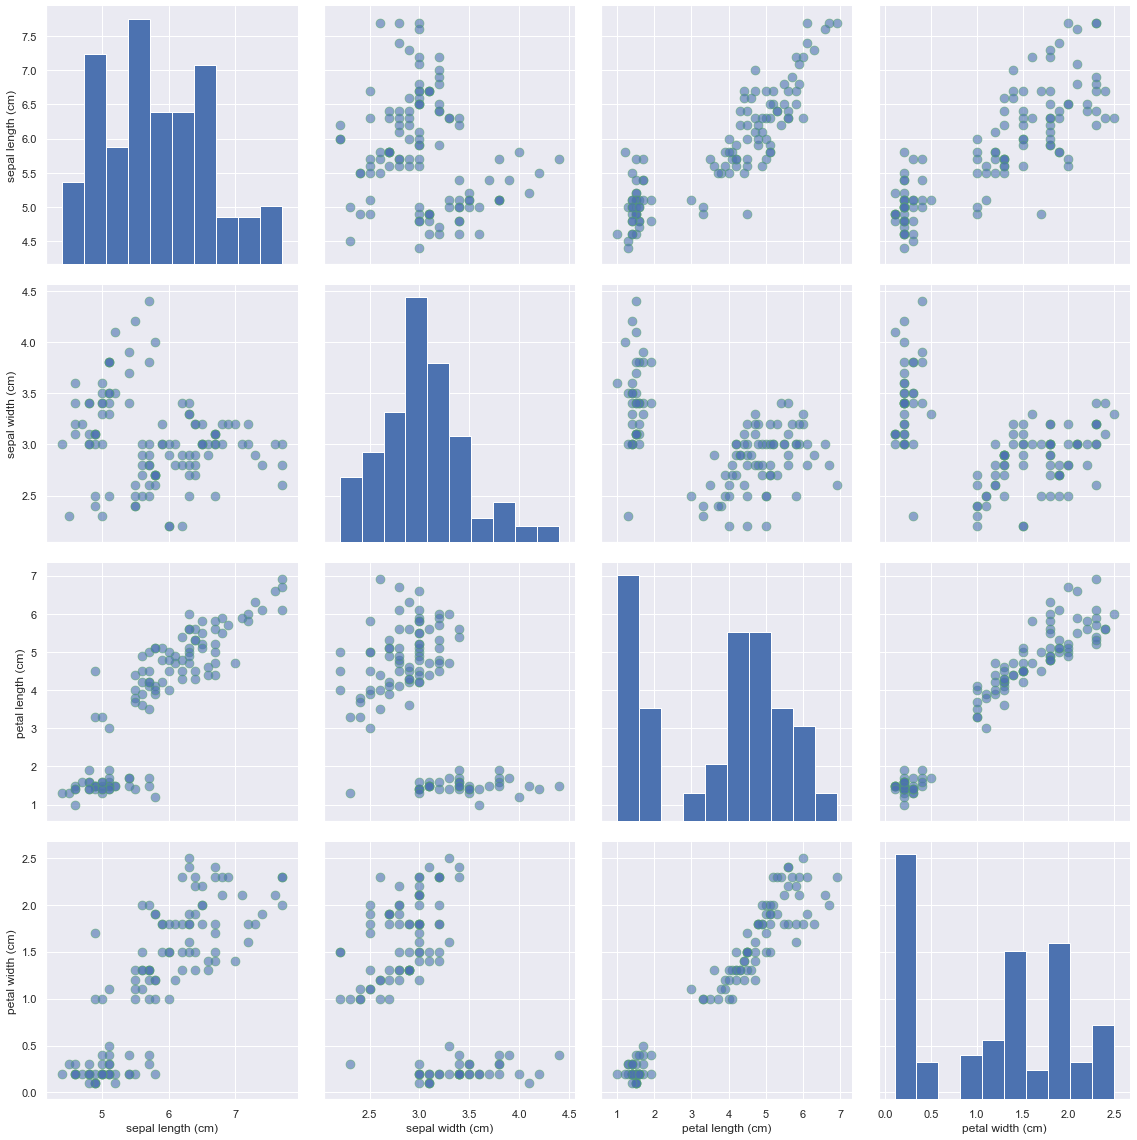

In [16]:
#sns.pairplot(a)
# create a pairplotfrom the df_train, color by type
a = df_train.drop(['TYPE'], axis=1)
sns.pairplot(a, plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'g'}, height = 4)

### Clustering

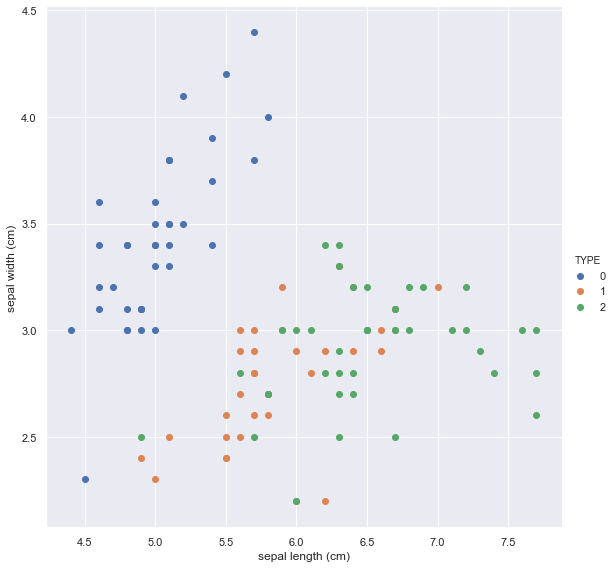

In [13]:
sns.FacetGrid(df_train, hue='TYPE', height=8).map(plt.scatter, 'sepal length (cm)', 'sepal width (cm)').add_legend()

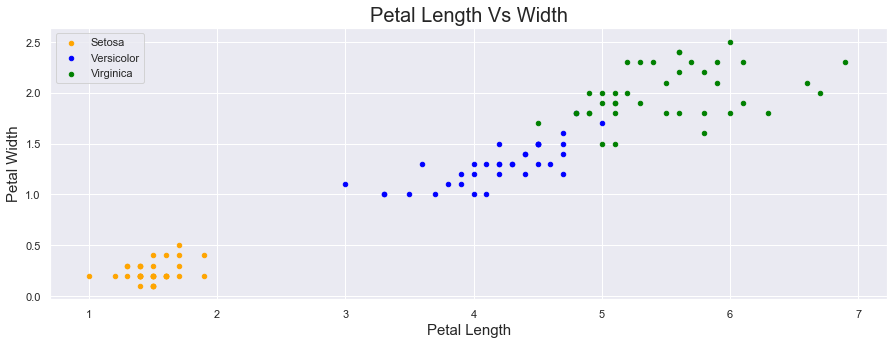

In [14]:
fig = df_train[df_train.TYPE == 0].plot(kind='scatter', x='petal length (cm)', 
                                        y='petal width (cm)', color='orange', label='Setosa')
df_train[df_train.TYPE == 1].plot(kind='scatter', x='petal length (cm)',
                                             y='petal width (cm)', color='blue', label='Versicolor', ax=fig)
df_train[df_train.TYPE == 2].plot(kind='scatter', x='petal length (cm)', 
                                            y='petal width (cm)', color='green', label='Virginica', ax=fig)
fig.set_xlabel('Petal Length', size = 15)
fig.set_ylabel('Petal Width', size = 15)
fig.set_title('Petal Length Vs Width', size = 20)

fig=plt.gcf()
fig.set_size_inches(15, 5)
plt.show()

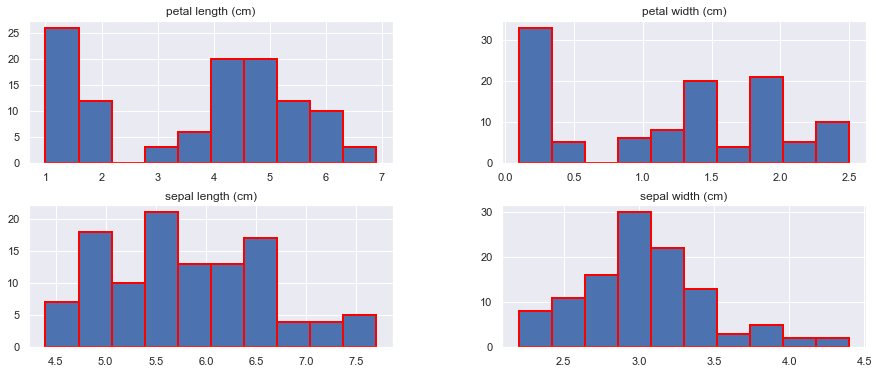

In [18]:
a = df_train.drop(['TYPE'], axis=1)
a.hist(edgecolor='red', linewidth=2)
fig = plt.gcf()
fig.set_size_inches(15,6)
plt.show()

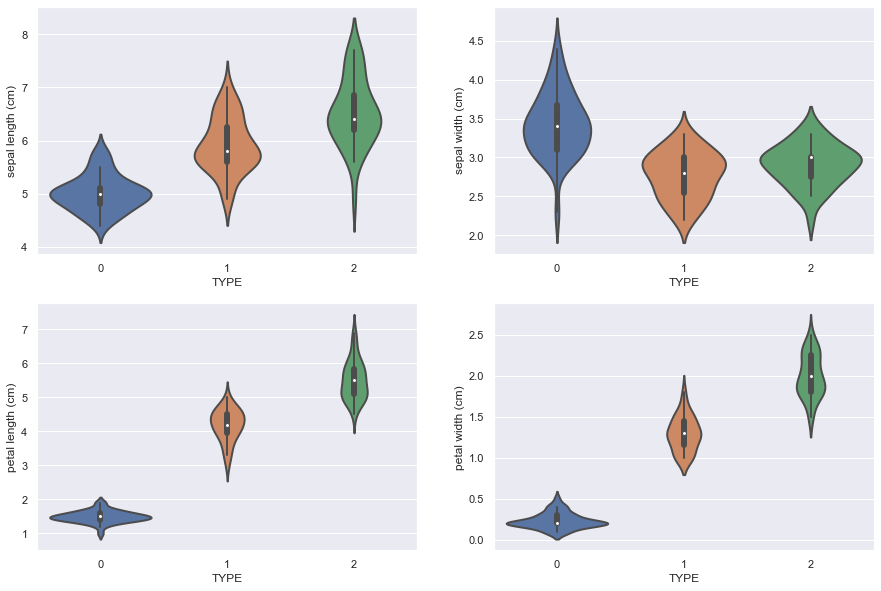

In [19]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='TYPE', y = 'sepal length (cm)', data=df_train,edgecolor='red', linewidth=2)
plt.subplot(2,2,2)
sns.violinplot(x='TYPE', y = 'sepal width (cm)', data=df_train,edgecolor='red', linewidth=2)

plt.subplot(2,2,3)
sns.violinplot(x='TYPE', y = 'petal length (cm)', data=df_train, edgecolor='red', linewidth=2)
plt.subplot(2,2,4)
sns.violinplot(x='TYPE', y = 'petal width (cm)', data=df_train, edgecolor='red', linewidth=2)

#### Features correlation

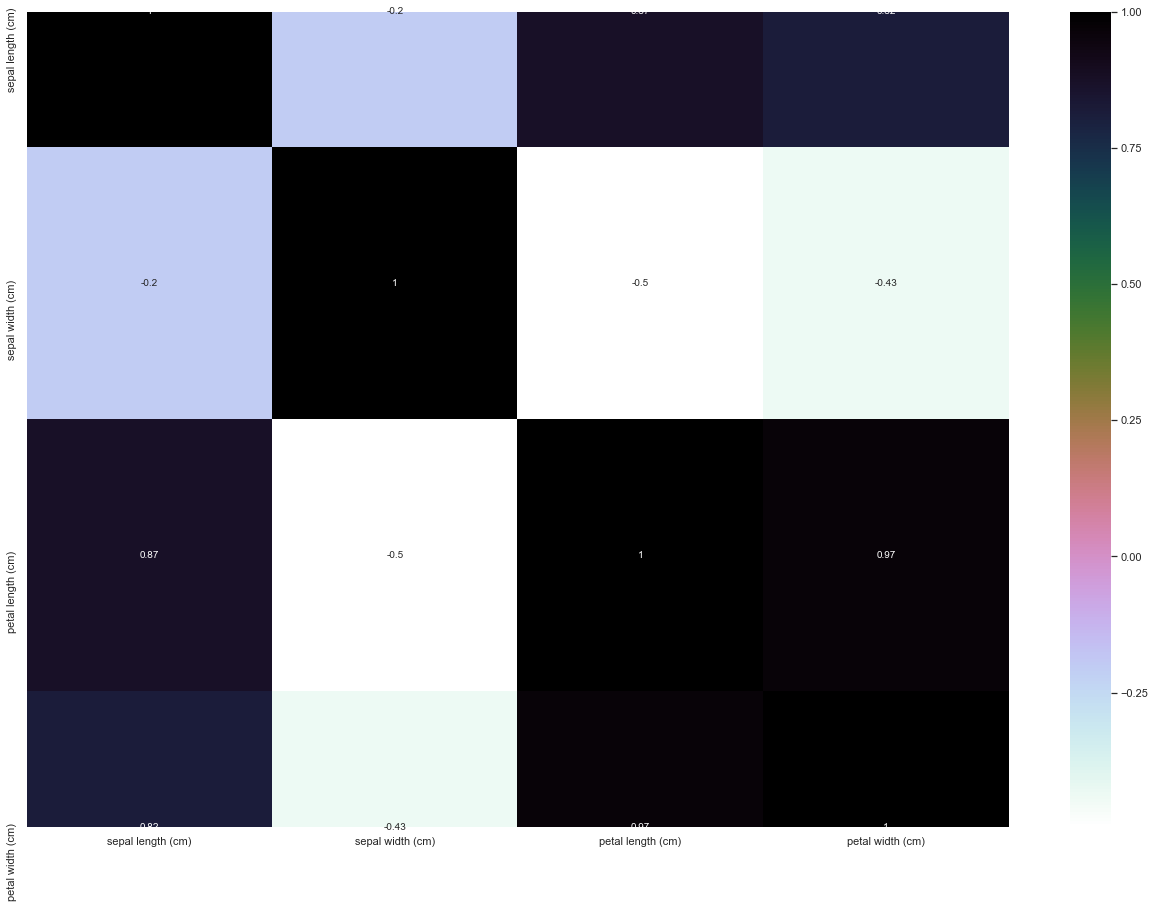

In [20]:
plt.figure(figsize=(22,15))
sns.heatmap(a.corr(), annot=True, cmap='cubehelix_r') # draws heatmap with input as correlation matrix calculated by iris.corr() 
plt.show()

#### Observation from the headmap
- The Sepal Width and Length are not correlated.
- The Petal Width and Length are highly correlated

We will use all the features for training the algorithm and check the accuracy.

---
Training and Testing Data
---
We want to build a machine learning model from this data that can predict the species of iris for a new set of measurements. But before we can apply our model to new measurements, we need to know whether it actually works—that is, whether we should trust its predictions.


Unfortunately, we cannot use the data we used to build the model to evaluate it. This is because our model can always simply remember the whole training set, and will therefore always predict the correct label for any point in the training set. This _“remembering”_ does not indicate to us whether our model will generalize well (in
other words, whether it will also perform well on new data).

To assess the model’s performance, we show it new data (data that it hasn’t seen before) for which we have labels. This is usually done by splitting the labeled data we have collected into two parts. One part of the data is used to build our machine learning model, and is called the **_training data_** or **_training set_**. The rest of the data will be used to assess how well the model works; this is called the **_test data_**, **_test set_**, or **_hold-out set_**.

In this exercise we have already been given a split data: `Iris_train` and `Iris_test`.

We'd use `scikit-learn`'s `train_test_split` function to split out data into training and testing sets had we not been given data that has not already been split. $75:25$ % data split is a good rule of thumb, but you can split data however you think will be good for a _'good'_ model. 

Here is a short synopsis of why we chose $X$ instead of $x$, and $y$ instead of capital $Y$. 
We denoted data with a capital $X$ and labels(target) are denoted by a lowercase $y$. This may seem arbitrary but the real motivation comes from the mathematical formulation of functions: $f(x) = y$. We know that $x$ is the input, and $y$ is an output.


Because our data is a two-dimensional array (matrix), we denote with uppercase $X$; on the other hand, the target is a one-dimensional array(vector) so it will be denoted by lower case $y$. 

Let's go ahead and and assign the outputs:

In [26]:
# To confirm number of classes
n_labels = df_train['TYPE'].nunique()
print('Number of clasess = %d ' % n_labels)


Number of clasess = 3 


In [29]:
# Split into target variable and independent variables
X_train = df_train.drop(['TYPE'], axis = 1)#.values

# target
y_train = df_train['TYPE']#.values 

In [30]:
# check shape of train datasets
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

X_train shape: (112, 4)
y_train shape: (112,)


In [41]:
X_test = df_test#.values
#X_test.head()

In [47]:
y_test = pd.read_csv('Iris_test_labels.csv')

In [48]:
# check shape of test datasets
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))
print("y_real shape: {}".format(y_real.shape))

X_test shape: (38, 4)
y_test shape: (38, 1)
y_real shape: (38, 1)


In [49]:
from sklearn import preprocessing
std_scaler = preprocessing.StandardScaler()
std_scaler.fit(X_train)
X_train_std_sk = std_scaler.transform(X_train)
X_test_std_sk = std_scaler.transform(X_test)

### Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression
logreg_model = LogisticRegression()
logreg_model.fit(X_train_std_sk, y_train)
logreg_model_pred = logreg_model.predict(X_test_std_sk)
print('The accuracy of Logistic Regression is ≈', 
      round((metrics.accuracy_score(logreg_model_pred, y_test))*100,2),'%')


The accuracy of Logistic Regression is ≈ 94.74 %


#### Predictions

In [55]:
y_pred = logreg_model_pred
y_pred1 = pd.DataFrame(y_pred)

In [57]:
y_pred1.head()

,0
0,1
1,0
2,2
3,2
4,1


---
---
### Support Vector Machine SVM

In [47]:
SVM_model = svm.SVC() # select the svm algorithm

# we train the algorithm with training data and training output
SVM_model.fit(X_train, y_train)

# we pass the testing data to the stored algorithm to predict the outcome
SVM_prediction = SVM_model.predict(X_test)
print('The accuracy of the SVM is ≈', round((metrics.accuracy_score(SVM_prediction, y_test))*100,2),'%') 
# we check the accuracy of the algorithm
#we pass the predicted output by the model and the actual output

The accuracy of the SVM is ≈ 94.74 %


### Decision Tree

In [48]:
DTC_model = DecisionTreeClassifier()
DTC_model.fit(X_train, y_train)
DTC_prediction = DTC_model.predict(X_test)
print('The accuracy of Decision Tree is ≈',round((metrics.accuracy_score(DTC_prediction, y_test))*100,2),'%')

The accuracy of Decision Tree is ≈ 94.74 %


From the plots, we can see that the three classes seem to be relatively well separated using the sepal and petal measurements. This means that a machine learning model will likely be able to learn to separate them.

---
k-Nearest Neighbors
---
While there are many `scikit-learn` classification algorithms that we can make use of as seen from above, here we will use a **_k_-nearest neighbors** classifier.


KNN can be used for both classification and regression predictive problems. KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations  $(x,y)$  and would like to capture the relationship between  $x$  and  $y$ . More formally, our goal is to learn a function  $h:X→Y$  so that given an unseen observation  $x$ ,  $h(x)$  can confidently predict the corresponding output  $y$ .

In [49]:
knn_model = KNeighborsClassifier(n_neighbors=3)# this examines 3 neighbors for putting the data into class
# fit the knn model with train datasets
knn_model.fit(X_train, y_train)
# predict
knn_prediction = knn_model.predict(X_test)
print('The accuracy of KNN is ≈', round((metrics.accuracy_score(knn_prediction, y_test))*100,2),'%')

The accuracy of KNN is ≈ 94.74 %


---
Making Predictions
---
We can now make predictions using this model on new data for which we might not
know the correct labels. Imagine we found an iris in the wild with the following:
- a sepal length of $5 cm$, 
- a sepal width of $2.9 cm$, 
- a petal length of $1 cm$, and 
- a petal width of $0.2 cm$.


What species of iris would this be? We can put this data into a NumPy array, again by
calculating the shape—that is, the number of samples (1) multiplied by the number of
features (4):

In [50]:
X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape: {}".format(X_new.shape))

X_new.shape: (1, 4)


Note that we made the measurements of this single flower into a row in a twodimensional NumPy array, as scikit-learn always expects two-dimensional arrays
for the data.


To make a prediction, we call the `predict` method of the knn object:

In [58]:
prediction = knn_model.predict(X_new)
print("Prediction: {}".format(prediction))
if prediction == 0:
    print('Predicted target name is Setosa')
else:
    print('Predicted target name is something else')
    
#print("Predicted target name: {}".format(
 #iris_df['Target'][prediction]))

NameError: name 'knn_model' is not defined

Our model predicts that this new iris belongs to the class 0, meaning its species is
setosa. But how do we know whether we can trust our model? We don’t know the correct species of this sample, which is the whole point of building the model!

---
## Evaluating the Model

This is where the test set that we created earlier comes in. This data was not used to
build the model, but we do know what the correct species is for each iris in the test
set.
Therefore, we can make a prediction for each iris in the test data and compare it
against its label (the known species). We can measure how well the model works by
computing the *$accuracy$*, which is the fraction of flowers for which the right species
was predicted:

In [2]:
y_pred = knn_model.predict(X_test)
print("Test set predictions:\n {}".format(y_pred))

NameError: name 'knn_model' is not defined

#### <font color=blue> Accuracy Score

In [53]:
#print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))
from sklearn.metrics import accuracy_score
print('Our model is ≈', round(accuracy_score(y_real, y_pred),2)*100,'% accurate. ')

Our model is ≈ 95.0 % accurate. 


We can also use the score method of the knn_model object, which will compute the test set
accuracy for us:

In [54]:
print("Our kNN Model's Test set score is ≈ {:.2f}".format(round(knn_model.score(X_test, y_test),2)*100), '% accurate.')

Our kNN Model's Test set score is ≈ 95.00 % accurate.


For this model, the test set accuracy is about $0.95$, which means we made the right prediction for $95$% of the irises in the test set. Under some mathematical assumptions, this means that we can expect our model to be correct $95$% of the time for new irises. For our hobby botanist application, this high level of accuracy means that our model may be trustworthy enough to use.

#### <font color=blue> Calculate y_score </font> 

In [381]:
y_score = logreg.predict_proba(X_test_std_sk)
y_score[:2]

array([[1.17558856e-02, 8.29572410e-01, 1.58671705e-01],
       [9.88248573e-01, 1.17512046e-02, 2.22689581e-07]])

#### <font color=blue> Binarize real labels (one-hot encoder) </font>

In [59]:
# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

In [60]:
from sklearn.metrics import roc_curve, auc
#from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

#### <font color=blue> Calculate AUC for each class </font>

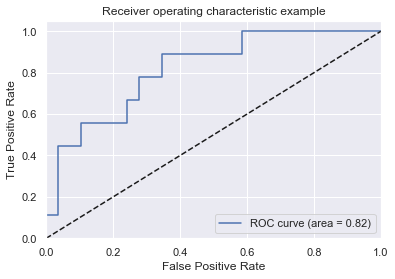

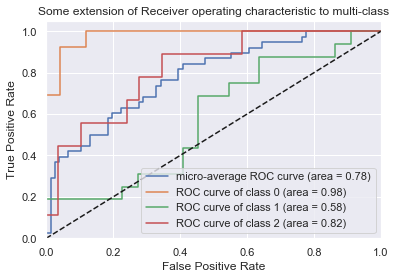

In [71]:

# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.253,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr[2], tpr[2], label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Plot ROC curve
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

array([0.        , 0.        , 0.01315789, 0.01315789, 0.02631579,
       0.02631579, 0.03947368, 0.03947368, 0.06578947, 0.06578947,
       0.10526316, 0.10526316, 0.13157895, 0.13157895, 0.18421053,
       0.18421053, 0.19736842, 0.19736842, 0.22368421, 0.22368421,
       0.27631579, 0.27631579, 0.28947368, 0.28947368, 0.32894737,
       0.32894737, 0.34210526, 0.34210526, 0.39473684, 0.39473684,
       0.40789474, 0.40789474, 0.47368421, 0.47368421, 0.55263158,
       0.55263158, 0.60526316, 0.60526316, 0.64473684, 0.64473684,
       0.76315789, 0.76315789, 0.77631579, 0.77631579, 1.        ])

In [69]:
roc_auc["micro"]

0.7832409972299169

#### <font color=blue> Confusion Matrix </font>
Confusion matrix is a square matrix that reports the counts of the true positive, true negative, false positive, and false negative predictions of a classifier.

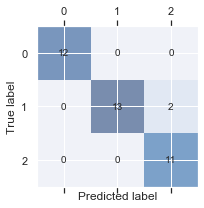

In [242]:
from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_real, y_pred)

fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.5)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()